In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [2]:
dataset = pd.read_csv("car_price_dataset.csv",index_col=0)

dataset = dataset.drop(["TRIM","ITEM_CONDITION","City"],axis=1)

In [3]:
thresh_na = 0.7
filter_dataset = dataset.loc[:, dataset.isnull().mean() < thresh_na]
remain_dataset =  dataset.loc[:, dataset.isnull().mean() > thresh_na]

#filter_dataset["DOORS"] = filter_dataset["DOORS"].astype("str")
used_cols = list(filter_dataset.columns.values)
remain_cols = (remain_dataset.columns.values)
print("Características a utilizar:",used_cols)
print("Características desechadas:",remain_cols)

Características a utilizar: ['Condition', 'State', 'TRACTION_CONTROL', 'HAS_AIR_CONDITIONING', 'ENGINE_DISPLACEMENT', 'BRAND', 'DOORS', 'ENGINE', 'FUEL_TYPE', 'KILOMETERS', 'MODEL', 'TRANSMISSION', 'VEHICLE_YEAR', 'Price_MXN']
Características desechadas: ['LENGTH' 'PASSENGER_CAPACITY' 'POWER' 'SINGLE_OWNER'
 'ENGINE_MANUFACTURER' 'MOTO_TYPE' 'CYLINDERS' 'LOADING_CAPACITY'
 'HOURS_OF_USE' 'FORKLIFT_TYPE' 'HAS_POWER_TRIM' 'ENGINE_QUANTITY' 'BEAM'
 'OPERATING_WEIGHT' 'LINE' 'WEIGHT' 'DRAFT' 'INTERNAL_DIAMETER'
 'MAX_POWER']


In [4]:
filter_dataset.head()

,Condition,State,TRACTION_CONTROL,HAS_AIR_CONDITIONING,ENGINE_DISPLACEMENT,BRAND,DOORS,ENGINE,FUEL_TYPE,KILOMETERS,MODEL,TRANSMISSION,VEHICLE_YEAR,Price_MXN
MLM805152052,used,Hidalgo,Trasera,Sí,1991.0,Mercedes-Benz,4.0,2.0,Gasolina,43145.0,Clase E,Automática,2016.0,329000.0
MLM804194237,used,Hidalgo,Trasera,Sí,1997.0,BMW,2.0,2.0,Gasolina,78000.0,Serie 2,Automática,2016.0,295000.0
MLM810635258,used,Hidalgo,NaN,NaN,650.0,Can-Am,NaN,NaN,NaN,1350.0,Outlander,NaN,2018.0,189000.0
MLM805511847,used,Hidalgo,4x4,Sí,3600.0,Porsche,5.0,3.6,Gasolina,99500.0,Cayenne,Automática,2008.0,259000.0
MLM796882323,used,Puebla,4x4,Sí,3600.0,Cadillac,5.0,3.6,Gasolina,42000.0,SRX,Automática,2016.0,349900.0


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(filter_dataset[used_cols],
                                                    filter_dataset['Price_MXN'],
                                                    test_size=0.1,
                                                    random_state=0)
X_train = X_train.drop("Price_MXN",axis=1)
X_test = X_test.drop("Price_MXN",axis=1)

# Mising Data Imputation

## Missing Indicator

First we add a Missing Indicator flag to those categories that will be imputed using  Mean/ Median/ Mode or Most Frequent category techniques

In [6]:
imputer = mdi.AddMissingIndicator(variables=['KILOMETERS',
                                             'ENGINE_DISPLACEMENT',
                                             "DOORS","FUEL_TYPE",
                                             "TRACTION_CONTROL"])

In [7]:
imputer.fit(X_train)

AddMissingIndicator(variables=['KILOMETERS', 'ENGINE_DISPLACEMENT', 'DOORS',
                               'FUEL_TYPE', 'TRACTION_CONTROL'])

In [8]:
tmp=imputer.transform(X_train)

In [9]:
tmp.head()

,Condition,State,TRACTION_CONTROL,HAS_AIR_CONDITIONING,ENGINE_DISPLACEMENT,BRAND,DOORS,ENGINE,FUEL_TYPE,KILOMETERS,MODEL,TRANSMISSION,VEHICLE_YEAR,KILOMETERS_na,ENGINE_DISPLACEMENT_na,DOORS_na,FUEL_TYPE_na,TRACTION_CONTROL_na
MLM813757912,used,Estado De México,Delantera,NaN,1600.0,Volkswagen,5.0,1.6,Gasolina,53000.0,Polo,Automática,2015.0,0,0,0,0,0
MLM791273964,used,Estado De México,4x4,NaN,NaN,Acura,5.0,NaN,Gasolina,59644.0,MDX,Automática,2016.0,0,1,0,0,0
MLM797034718,used,Distrito Federal,Trasera,NaN,1998.0,BMW,2.0,NaN,Gasolina,32500.0,Serie 4,Automática,2019.0,0,0,0,0,0
MLM794351110,used,Distrito Federal,NaN,NaN,NaN,Volvo,NaN,NaN,NaN,300000.0,9700 6x2,NaN,2007.0,0,1,1,1,1
MLM809556214,used,Distrito Federal,Delantera,Sí,1600.0,Ford,4.0,1.6,Gasolina,49970.0,Fiesta,Manual,2016.0,0,0,0,0,0


## Mean / Median Imputation

The numeric features considered for this type of imputation are : KILOMETERS

In [10]:
column_info = pd.concat([X_train.isnull().mean(),X_train.dtypes],axis=1)
column_info.columns=["%","Type"]
display(column_info.sort_values(by=["Type","%"]))

,%,Type
VEHICLE_YEAR,0.000223,float64
KILOMETERS,0.053864,float64
DOORS,0.152782,float64
ENGINE_DISPLACEMENT,0.385413,float64
Condition,0.000000,object
State,0.000000,object
BRAND,0.013048,object
MODEL,0.024200,object
FUEL_TYPE,0.109736,object
TRANSMISSION,0.187242,object


In [11]:
# we call the imputer from feature-engine
# we specify the imputation strategy, median in this case

imputer = mdi.MeanMedianImputer(imputation_method='median',variables = ['KILOMETERS','ENGINE_DISPLACEMENT','VEHICLE_YEAR'])

In [12]:
# we fit the imputer
imputer.fit(X_train)

MeanMedianImputer(variables=['KILOMETERS', 'ENGINE_DISPLACEMENT',
                             'VEHICLE_YEAR'])

In [13]:
imputer.variables

['KILOMETERS', 'ENGINE_DISPLACEMENT', 'VEHICLE_YEAR']

In [14]:
imputer.imputer_dict_

{'KILOMETERS': 45285.5, 'ENGINE_DISPLACEMENT': 1998.0, 'VEHICLE_YEAR': 2016.0}

In [15]:
tmp = imputer.transform(X_train)
tmp.head()

,Condition,State,TRACTION_CONTROL,HAS_AIR_CONDITIONING,ENGINE_DISPLACEMENT,BRAND,DOORS,ENGINE,FUEL_TYPE,KILOMETERS,MODEL,TRANSMISSION,VEHICLE_YEAR
MLM813757912,used,Estado De México,Delantera,NaN,1600.0,Volkswagen,5.0,1.6,Gasolina,53000.0,Polo,Automática,2015.0
MLM791273964,used,Estado De México,4x4,NaN,1998.0,Acura,5.0,NaN,Gasolina,59644.0,MDX,Automática,2016.0
MLM797034718,used,Distrito Federal,Trasera,NaN,1998.0,BMW,2.0,NaN,Gasolina,32500.0,Serie 4,Automática,2019.0
MLM794351110,used,Distrito Federal,NaN,NaN,1998.0,Volvo,NaN,NaN,NaN,300000.0,9700 6x2,NaN,2007.0
MLM809556214,used,Distrito Federal,Delantera,Sí,1600.0,Ford,4.0,1.6,Gasolina,49970.0,Fiesta,Manual,2016.0


In [16]:
tmp[imputer.variables].isnull().mean()

KILOMETERS             0.0
ENGINE_DISPLACEMENT    0.0
VEHICLE_YEAR           0.0
dtype: float64

## Most Common Category Imputation

In [17]:
X_train["DOORS"] = X_train["DOORS"].astype("object")

In [18]:
column_info = pd.concat([X_train.isnull().mean(),X_train.dtypes],axis=1)
column_info.columns=["%","Type"]
display(column_info.sort_values(by=["Type","%"]))

,%,Type
VEHICLE_YEAR,0.000223,float64
KILOMETERS,0.053864,float64
ENGINE_DISPLACEMENT,0.385413,float64
Condition,0.000000,object
State,0.000000,object
BRAND,0.013048,object
MODEL,0.024200,object
FUEL_TYPE,0.109736,object
DOORS,0.152782,object
TRANSMISSION,0.187242,object


In [19]:
imputer = mdi.CategoricalVariableImputer(imputation_method='frequent',variables = ["DOORS","FUEL_TYPE","TRACTION_CONTROL"])

In [20]:
imputer.fit(X_train)

CategoricalVariableImputer(imputation_method='frequent',
                           variables=['DOORS', 'FUEL_TYPE', 'TRACTION_CONTROL'])

In [21]:
imputer.imputer_dict_

{'DOORS': 5.0, 'FUEL_TYPE': 'Gasolina', 'TRACTION_CONTROL': 'Delantera'}

In [22]:
tmp = imputer.transform(X_train)
tmp.head()

,Condition,State,TRACTION_CONTROL,HAS_AIR_CONDITIONING,ENGINE_DISPLACEMENT,BRAND,DOORS,ENGINE,FUEL_TYPE,KILOMETERS,MODEL,TRANSMISSION,VEHICLE_YEAR
MLM813757912,used,Estado De México,Delantera,NaN,1600.0,Volkswagen,5.0,1.6,Gasolina,53000.0,Polo,Automática,2015.0
MLM791273964,used,Estado De México,4x4,NaN,NaN,Acura,5.0,NaN,Gasolina,59644.0,MDX,Automática,2016.0
MLM797034718,used,Distrito Federal,Trasera,NaN,1998.0,BMW,2.0,NaN,Gasolina,32500.0,Serie 4,Automática,2019.0
MLM794351110,used,Distrito Federal,Delantera,NaN,NaN,Volvo,5.0,NaN,Gasolina,300000.0,9700 6x2,NaN,2007.0
MLM809556214,used,Distrito Federal,Delantera,Sí,1600.0,Ford,4.0,1.6,Gasolina,49970.0,Fiesta,Manual,2016.0


In [23]:
tmp[imputer.variables].isnull().mean()

DOORS               0.0
FUEL_TYPE           0.0
TRACTION_CONTROL    0.0
dtype: float64

## Missing Category Imputation

In [24]:
column_info = pd.concat([X_train.isnull().mean(),X_train.dtypes],axis=1)
column_info.columns=["%","Type"]
display(column_info.sort_values(by=["Type","%"]))

,%,Type
VEHICLE_YEAR,0.000223,float64
KILOMETERS,0.053864,float64
ENGINE_DISPLACEMENT,0.385413,float64
Condition,0.000000,object
State,0.000000,object
BRAND,0.013048,object
MODEL,0.024200,object
FUEL_TYPE,0.109736,object
DOORS,0.152782,object
TRANSMISSION,0.187242,object


In [25]:
imputer = mdi.CategoricalVariableImputer(variables=["BRAND","MODEL","TRANSMISSION","TRANSMISSION","HAS_AIR_CONDITIONING","ENGINE"])

In [26]:
imputer.fit(X_train)

CategoricalVariableImputer(variables=['BRAND', 'MODEL', 'TRANSMISSION',
                                      'TRANSMISSION', 'HAS_AIR_CONDITIONING',
                                      'ENGINE'])

In [27]:
tmp = imputer.transform(X_train)

In [28]:
tmp.head()

,Condition,State,TRACTION_CONTROL,HAS_AIR_CONDITIONING,ENGINE_DISPLACEMENT,BRAND,DOORS,ENGINE,FUEL_TYPE,KILOMETERS,MODEL,TRANSMISSION,VEHICLE_YEAR
MLM813757912,used,Estado De México,Delantera,Missing,1600.0,Volkswagen,5,1.6,Gasolina,53000.0,Polo,Automática,2015.0
MLM791273964,used,Estado De México,4x4,Missing,NaN,Acura,5,Missing,Gasolina,59644.0,MDX,Automática,2016.0
MLM797034718,used,Distrito Federal,Trasera,Missing,1998.0,BMW,2,Missing,Gasolina,32500.0,Serie 4,Automática,2019.0
MLM794351110,used,Distrito Federal,NaN,Missing,NaN,Volvo,NaN,Missing,NaN,300000.0,9700 6x2,Missing,2007.0
MLM809556214,used,Distrito Federal,Delantera,Sí,1600.0,Ford,4,1.6,Gasolina,49970.0,Fiesta,Manual,2016.0


In [29]:
tmp.isnull().mean()

Condition               0.000000
State                   0.000000
TRACTION_CONTROL        0.248467
HAS_AIR_CONDITIONING    0.000000
ENGINE_DISPLACEMENT     0.385413
BRAND                   0.000000
DOORS                   0.152782
ENGINE                  0.000000
FUEL_TYPE               0.109736
KILOMETERS              0.053864
MODEL                   0.000000
TRANSMISSION            0.000000
VEHICLE_YEAR            0.000223
dtype: float64

## NA Imputation Pipeline 

In [30]:
from sklearn.pipeline import Pipeline

X_train["DOORS"] = X_train["DOORS"].astype("object")

pipe = Pipeline([
    ('missing_ind', mdi.AddMissingIndicator(variables=['KILOMETERS','ENGINE_DISPLACEMENT',
                                                       "DOORS","FUEL_TYPE","TRACTION_CONTROL"])),
    
    ('imputer_median', mdi.MeanMedianImputer(imputation_method='median',variables = ['KILOMETERS',
                                                                                    'ENGINE_DISPLACEMENT',
                                                                                     'VEHICLE_YEAR'])),
    
    ('imputer_mfv', mdi.CategoricalVariableImputer(imputation_method='frequent',variables = ["DOORS",
                                                                                             "FUEL_TYPE",
                                                                                             "TRACTION_CONTROL"])),
    ('imputer_missing_label', mdi.CategoricalVariableImputer(variables=["BRAND","MODEL",
                                                                        "TRANSMISSION",
                                                                        "HAS_AIR_CONDITIONING",
                                                                        "ENGINE"])),
])

In [31]:
pipe.fit(X_train)

Pipeline(steps=[('missing_ind',
                 AddMissingIndicator(variables=['KILOMETERS',
                                                'ENGINE_DISPLACEMENT', 'DOORS',
                                                'FUEL_TYPE',
                                                'TRACTION_CONTROL'])),
                ('imputer_median',
                 MeanMedianImputer(variables=['KILOMETERS',
                                              'ENGINE_DISPLACEMENT',
                                              'VEHICLE_YEAR'])),
                ('imputer_mfv',
                 CategoricalVariableImputer(imputation_method='frequent',
                                            variables=['DOORS', 'FUEL_TYPE',
                                                       'TRACTION_CONTROL'])),
                ('imputer_missing_label',
                 CategoricalVariableImputer(variables=['BRAND', 'MODEL',
                                                       'TRANSMISSION',
                  

In [32]:
X_train = pipe.transform(X_train)

In [33]:
X_train.DOORS.value_counts()

5.0    4653
4.0    2982
2.0     970
3.0     257
0.0      99
6.0       5
7.0       1
Name: DOORS, dtype: int64

# Categorical Feature Encoding

## Rare category addition

In [34]:
X_train["DOORS"] = X_train["DOORS"].astype("object")

In [35]:
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder

In [36]:
# Rare value encoder
rare_encoder_city = RareLabelCategoricalEncoder(
    tol=0.03,  # minimal percentage to be considered non-rare
    n_categories=10, # minimal number of categories the variable should have to re-cgroup rare categories
    variables=['State'] # variables to re-group
)

rare_encoder_tc = RareLabelCategoricalEncoder(
    tol=0.03,  # minimal percentage to be considered non-rare
    n_categories=3, # minimal number of categories the variable should have to re-cgroup rare categories
    variables=['TRACTION_CONTROL','DOORS',"ENGINE","FUEL_TYPE","TRANSMISSION"] # variables to re-group
)

rare_encoder_brand_model = RareLabelCategoricalEncoder(
    tol=0.01,  # minimal percentage to be considered non-rare
    n_categories=10, # minimal number of categories the variable should have to re-cgroup rare categories
    variables=['BRAND','MODEL'] # variables to re-group
)


In [37]:
rare_encoder_city.fit(X_train)
rare_encoder_tc.fit(X_train)
rare_encoder_brand_model.fit(X_train)

RareLabelCategoricalEncoder(tol=0.01, variables=['BRAND', 'MODEL'])

In [38]:
X_train = rare_encoder_city.transform(X_train)
X_train = rare_encoder_tc.transform(X_train)
X_train = rare_encoder_brand_model.transform(X_train)

In [39]:
X_train.head()

,Condition,State,TRACTION_CONTROL,HAS_AIR_CONDITIONING,ENGINE_DISPLACEMENT,BRAND,DOORS,ENGINE,FUEL_TYPE,KILOMETERS,MODEL,TRANSMISSION,VEHICLE_YEAR,KILOMETERS_na,ENGINE_DISPLACEMENT_na,DOORS_na,FUEL_TYPE_na,TRACTION_CONTROL_na
MLM813757912,used,Estado De México,Delantera,Missing,1600.0,Volkswagen,5,1.6,Gasolina,53000.0,Rare,Automática,2015.0,0,0,0,0,0
MLM791273964,used,Estado De México,4x4,Missing,1998.0,Rare,5,Missing,Gasolina,59644.0,Rare,Automática,2016.0,0,1,0,0,0
MLM797034718,used,Distrito Federal,Trasera,Missing,1998.0,BMW,2,Missing,Gasolina,32500.0,Rare,Automática,2019.0,0,0,0,0,0
MLM794351110,used,Distrito Federal,Delantera,Missing,1998.0,Rare,5,Missing,Gasolina,300000.0,Rare,Missing,2007.0,0,1,1,1,1
MLM809556214,used,Distrito Federal,Delantera,Sí,1600.0,Ford,4,1.6,Gasolina,49970.0,Rare,Manual,2016.0,0,0,0,0,0


## Ordered Integer Encoding 

In [40]:
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

In [41]:
ordinal_enc = OrdinalCategoricalEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
    encoding_method='ordered',
    variables=['Condition',"State","TRACTION_CONTROL","HAS_AIR_CONDITIONING","BRAND","DOORS","ENGINE","FUEL_TYPE","MODEL","TRANSMISSION"])

In [42]:
ordinal_enc.fit(X_train, y_train)

OrdinalCategoricalEncoder(variables=['Condition', 'State', 'TRACTION_CONTROL',
                                     'HAS_AIR_CONDITIONING', 'BRAND', 'DOORS',
                                     'ENGINE', 'FUEL_TYPE', 'MODEL',
                                     'TRANSMISSION'])

In [43]:
ordinal_enc.encoder_dict_

{'Condition': {'used': 0, 'not_specified': 1, 'new': 2},
 'State': {'Puebla': 0,
  'Jalisco': 1,
  'Distrito Federal': 2,
  'Nuevo León': 3,
  'Estado De México': 4,
  'Guanajuato': 5,
  'Querétaro': 6,
  'Rare': 7},
 'TRACTION_CONTROL': {'Delantera': 0,
  '4x2': 1,
  'Trasera': 2,
  '4x4': 3,
  'Rare': 4},
 'HAS_AIR_CONDITIONING': {'Sí': 0, 'Missing': 1, 'No': 2},
 'BRAND': {'Renault': 0,
  'Nissan': 1,
  'Hyundai': 2,
  'Volkswagen': 3,
  'Mazda': 4,
  'Honda': 5,
  'SEAT': 6,
  'Dodge': 7,
  'Chevrolet': 8,
  'Toyota': 9,
  'Mini': 10,
  'Kia': 11,
  'Ford': 12,
  'Missing': 13,
  'Rare': 14,
  'BMW': 15,
  'Jeep': 16,
  'Audi': 17,
  'Mercedes-Benz': 18,
  'Porsche': 19},
 'DOORS': {4.0: 0, 'Rare': 1, 5.0: 2, 2.0: 3},
 'ENGINE': {'1.6': 0, '2.5': 1, '2.0': 2, 'Missing': 3, 'Rare': 4},
 'FUEL_TYPE': {'Gasolina': 0, 'Rare': 1},
 'MODEL': {'Aveo': 0,
  'Vento': 1,
  'Versa': 2,
  'Sentra': 3,
  'Mazda 3': 4,
  'Jetta': 5,
  'CR-V': 6,
  'Missing': 7,
  'Serie 3': 8,
  'Rare': 9,
  'Cl

In [44]:
X_train = ordinal_enc.transform(X_train)

In [45]:
X_train.head()

,Condition,State,TRACTION_CONTROL,HAS_AIR_CONDITIONING,ENGINE_DISPLACEMENT,BRAND,DOORS,ENGINE,FUEL_TYPE,KILOMETERS,MODEL,TRANSMISSION,VEHICLE_YEAR,KILOMETERS_na,ENGINE_DISPLACEMENT_na,DOORS_na,FUEL_TYPE_na,TRACTION_CONTROL_na
MLM813757912,0,4,0,1,1600.0,3,2,0,0,53000.0,9,2,2015.0,0,0,0,0,0
MLM791273964,0,4,3,1,1998.0,14,2,3,0,59644.0,9,2,2016.0,0,1,0,0,0
MLM797034718,0,2,2,1,1998.0,15,3,3,0,32500.0,9,2,2019.0,0,0,0,0,0
MLM794351110,0,2,0,1,1998.0,14,2,3,0,300000.0,9,1,2007.0,0,1,1,1,1
MLM809556214,0,2,0,0,1600.0,12,0,0,0,49970.0,9,0,2016.0,0,0,0,0,0


In [49]:
import scipy.stats as stats
import matplotlib .pyplot as plt

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

In [50]:
from feature_engine import variable_transformers as vt

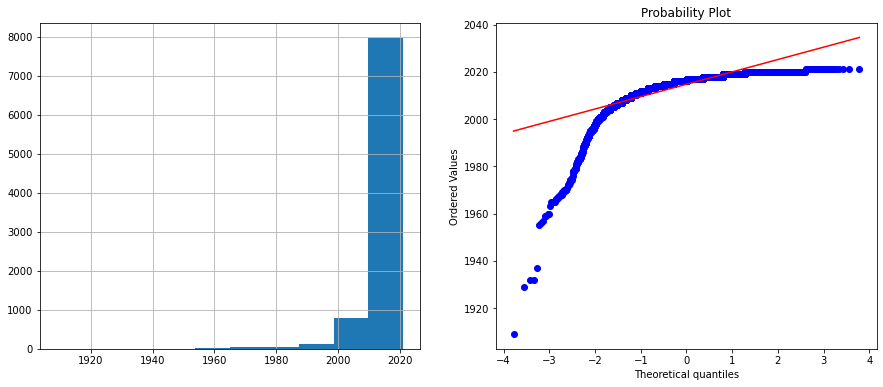

In [59]:
diagnostic_plots(X_train,"VEHICLE_YEAR")